In [1]:
from sklearn import datasets
import pandas as pd

In [2]:
import numpy as np

In [3]:
# load iris dataset
iris = datasets.load_iris()
# Since this is a bunch, create a dataframe
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target

In [4]:
iris_df

,0,1,2,3,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [7]:
X=iris.data
y=iris.target

In [8]:
iris.data.shape

(150, 4)

In [9]:
iris.target.shape

(150,)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = iris.data  # we only take the first two features.
y = iris.target
print(np.shape(X))
print(np.shape(y))
le = preprocessing.LabelEncoder() #
y_label=le.fit_transform(y)
classes=le.classes_

(150, 4)
(150,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.30, random_state=42)

In [12]:
import lightgbm as lgb

In [13]:
params = {
          "objective" : "multiclass",
          "num_class" : 4,
          "num_leaves" : 60,
          "max_depth": -1,
          "learning_rate" : 0.01,
          "bagging_fraction" : 0.9,  # subsample
          "feature_fraction" : 0.9,  # colsample_bytree
          "bagging_freq" : 5,        # subsample_freq
          "bagging_seed" : 2018,
          "verbosity" : -1 }

In [14]:
lgtrain, lgval = lgb.Dataset(X_train, y_train), lgb.Dataset(X_test, y_test)
lgbmodel = lgb.train(params, lgtrain, 2000, valid_sets=[lgtrain, lgval], early_stopping_rounds=150, verbose_eval=200)

Training until validation scores don't improve for 150 rounds


C:\Users\vasu0\anaconda3\envs\tensorflow\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vasu0\anaconda3\envs\tensorflow\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's multi_logloss: 0.155122	valid_1's multi_logloss: 0.0930595
[400]	training's multi_logloss: 0.0664589	valid_1's multi_logloss: 0.0219079
[600]	training's multi_logloss: 0.0352903	valid_1's multi_logloss: 0.0103859
[800]	training's multi_logloss: 0.0201351	valid_1's multi_logloss: 0.00600709
[1000]	training's multi_logloss: 0.0125695	valid_1's multi_logloss: 0.00366381
[1200]	training's multi_logloss: 0.00782969	valid_1's multi_logloss: 0.00277303
[1400]	training's multi_logloss: 0.00514641	valid_1's multi_logloss: 0.00162377
[1600]	training's multi_logloss: 0.00320621	valid_1's multi_logloss: 0.00108044
[1800]	training's multi_logloss: 0.00199478	valid_1's multi_logloss: 0.000675132
[2000]	training's multi_logloss: 0.00137517	valid_1's multi_logloss: 0.000409564
Did not meet early stopping. Best iteration is:
[2000]	training's multi_logloss: 0.00137517	valid_1's multi_logloss: 0.000409564


In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

y_pred =np.argmax(lgbmodel.predict(X_test),axis=1)
y_true =y_test

In [16]:

y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0], dtype=int64)

In [17]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

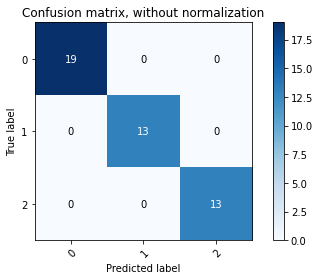

In [18]:
plot_confusion_matrix(y_true, y_pred, classes=classes,
                      title='Confusion matrix, without normalization')

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

1.0

In [20]:
df = pd.read_csv('HR_comma_sep.csv')

In [21]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [22]:
df1= pd.get_dummies(df.salary, prefix="salary")

In [23]:
df2=pd.get_dummies(df.Department, prefix="Department")

In [24]:
df12=pd.concat([df1,df2],axis='columns')

In [25]:
dfn=pd.concat([df,df12],axis='columns')

In [26]:
dfn

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,...,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,...,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,...,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,...,0,0,0,0,0,0,0,0,1,0


In [28]:
X=dfn.drop(['left','Department','salary'], axis=1)

In [29]:
y=dfn['left']

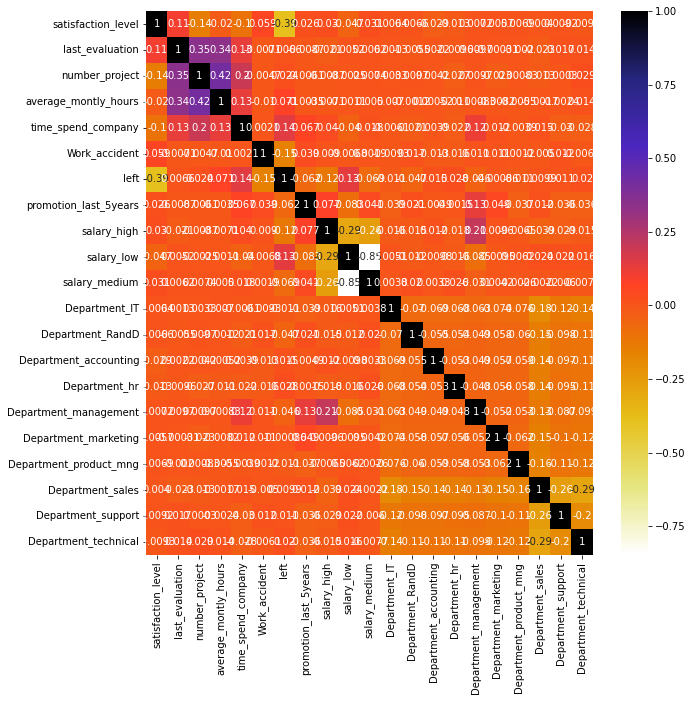

In [33]:
import seaborn as sns
plt.figure(figsize= (10,10))
cor = dfn.corr()
sns.heatmap(cor, annot=True, cmap = plt.cm.CMRmap_r)
plt.show()


In [47]:
from sklearn.model_selection import train_test_split 

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.25)

In [78]:
X_train.shape, X_test.shape

((11249, 20), (3750, 20))

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
model = LogisticRegression(max_iter=1000)

In [81]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [82]:
model.score(X_test, y_test)

0.7917333333333333

In [76]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [55]:
model.predict_proba(X_test)

array([[0.8689001 , 0.1310999 ],
       [0.9923398 , 0.0076602 ],
       [0.85361484, 0.14638516],
       ...,
       [0.50263461, 0.49736539],
       [0.95734013, 0.04265987],
       [0.34964272, 0.65035728]])

# PCA

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(0.95)

In [58]:
X_pca=pca.fit_transform(X)

In [59]:
X_pca.shape

(14999, 1)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.20)

In [95]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [96]:
model.score(X_test, y_test)

0.799

# Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB

In [98]:
model1=GaussianNB()

In [99]:
model1.fit(X_train, y_train)

GaussianNB()

In [101]:
model1.score(X_test, y_test)

0.6316666666666667

In [102]:
model1.predict_proba(X_test)

array([[9.99936014e-01, 6.39860393e-05],
       [1.00000000e+00, 4.34598572e-43],
       [9.99999998e-01, 2.04287840e-09],
       ...,
       [9.99999967e-01, 3.28321943e-08],
       [4.38182529e-02, 9.56181747e-01],
       [9.95876584e-02, 9.00412342e-01]])

# Random

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
model2=RandomForestClassifier()

In [105]:
model2.fit(X_train, y_train)

RandomForestClassifier()

In [107]:
model2.score(X_test, y_test)

0.987

In [110]:
model2.predict(X_test)

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [111]:
model2.predict_proba(X_test)

array([[1.  , 0.  ],
       [0.05, 0.95],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.99, 0.01]])

In [ ]:
X = X.drop(X.columns[X.apply(lambda col: col.isnull().sum()/len(X) > 0.50)], axis=1)